<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from IPython.display import Image

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [2]:
hh_data = pd.read_csv('data/hh_database.csv', delimiter=';')

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [3]:
hh_data.tail()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
44739,"Мужчина , 30 лет , родился 17 января 1989",50000 руб.,"Финансист, аналитик, экономист, бухгалтер, мен...","Тверь , готов к переезду (Москва, Химки) , гот...",полная занятость,"полный день, удаленная работа","Опыт работы 7 лет 7 месяцев Финансист, аналит...","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,Высшее образование 2015 Московский гуманитарн...,22.04.2019 12:32,Не указано
44740,"Мужчина , 27 лет , родился 5 марта 1992",39000 руб.,"Системный администратор, IT-специалист","Липецк , готов к переезду , готов к командировкам","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день, ...","Опыт работы 7 лет Системный администратор, IT...",ИП Пестрецов,Предприниматель,Высшее образование (Бакалавр) 2016 Воронежски...,22.04.2019 13:11,Не указано
44741,"Женщина , 48 лет , родилась 26 декабря 1970",40000 руб.,"Аналитик данных, Математик","Челябинск , готова к переезду , готова к редки...",полная занятость,"полный день, удаленная работа",Опыт работы 21 год 5 месяцев Январь 1998 — по...,"ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,Высшее образование 2000 Южно-Уральский госуда...,09.04.2019 05:07,Не указано
44742,"Мужчина , 24 года , родился 6 октября 1994",20000 руб.,Контент-менеджер,"Тамбов , не готов к переезду , не готов к кома...","частичная занятость, полная занятость",удаленная работа,Опыт работы 3 года 10 месяцев Контент-менедже...,IQ-Maxima,Менеджер проектов,Высшее образование 2015 Тамбовский государств...,26.04.2019 14:25,Имеется собственный автомобиль
44743,"Мужчина , 38 лет , родился 25 апреля 1980",120000 руб.,Руководитель проекта,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 15 лет 10 месяцев Руководитель пр...,ПАО ГК ТНС энерго,Руководитель отдела технической поддержки,Высшее образование 1997 Южно-Российский госуд...,05.07.2018 20:15,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [4]:
hh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

4. Обратите внимание на информацию о числе непустых значений.

In [5]:
# Определение суммы пропущенных значений для каждого столбца
missing_values = hh_data.isnull().sum()
# Вывод только тех столцов, где есть пропущенные значения
display(missing_values[missing_values != 0])

Опыт работы                        168
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
dtype: int64

5. Выведите основную статистическую информацию о столбцах.


In [6]:
hh_data.describe(include=['object'])

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 2014 Тюменский Государствен...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".


In [7]:
from functions.education import education

hh_data['Образование'] = hh_data['Образование и ВУЗ'].apply(education)
# Определение кол-ва людей,имеющих среднее образование
mask = hh_data['Образование'] == 'среднее'
display(f'Количество людей, исеющих среднее образование: {hh_data[mask].shape[0]}')

'Количество людей, исеющих среднее образование: 559'

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [8]:
from functions.gender_age import split_gender_age

hh_data[['Пол', 'Возраст']] = hh_data['Пол, возраст'].apply(split_gender_age)

In [9]:
# Отношение количества резуюмке по полу
display(round(hh_data['Пол'].value_counts(normalize=True)*100, 2))
# Средний возраст соискателей
display(f'Средний возраст соискателей = {round(hh_data['Возраст'].mean(), 1)} года(лет)')

Пол
М    80.93
Ж    19.07
Name: proportion, dtype: float64

'Средний возраст соискателей = 32.2 года(лет)'

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [10]:
from functions.experience import experience_by_month
# Подсчет опыта работы в месяцах
hh_data['Опыт работы(месяц)'] = hh_data['Опыт работы'].apply(experience_by_month)
# Опыт работы больше не имеет статистически важной информации
hh_data.drop('Опыт работы', axis=1, inplace=True)

In [11]:
# Медианное значение опыта работы в месяцах
display(f'Медианное значение опыта работы = {hh_data['Опыт работы(месяц)'].median()} месяцев')

'Медианное значение опыта работы = 100.0 месяцев'

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.



In [12]:
from functions.city_reloc_trip import city_reloc_trip

# Преобразование данных
hh_data[['Город', 'Готовность к переезду', 'Готовность к командировкам']] = hh_data['Город, переезд, командировки'].apply(city_reloc_trip)
# Столбец с данными больше не информативен
hh_data.drop('Город, переезд, командировки', axis=1, inplace=True)

In [13]:
len_df = mask.shape[0]

# Сколько процентов соискателей живут в Санкт-Петербурге
mask = hh_data['Город'] == 'Санкт-Петербург'
display(f'{round((hh_data[mask].shape[0] / len_df) * 100)}% соискателей живут в Санкт-Петербурге')

# Сколько процентов соискателей готовы одновременно и к переездам, и к командировкам
mask = hh_data['Готовность к переезду'] & hh_data['Готовность к командировкам']
display(f'Готовы одновременно и к переездам, и к командировкам {round(mask.sum() / len_df * 100)}% соискателей')

'11% соискателей живут в Санкт-Петербурге'

'Готовы одновременно и к переездам, и к командировкам 32% соискателей'

5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [14]:
# Разделение по dummy-признакам
employment = hh_data['Занятость'].str.get_dummies(sep=', ').astype('bool')
schedule = hh_data['График'].str.get_dummies(sep=', ').astype('bool')
# Объединение dummy-признаков и DataFrame
hh_data = pd.concat([hh_data, employment, schedule], axis=1)
# Удаление неинформативных признаков
hh_data.drop(columns=['Занятость', 'График'], axis=1, inplace=True)

In [15]:
display(f'{(hh_data['проектная работа'] & hh_data['волонтерство']).sum()} людей ищут проектную работу и волонтерство')
display(f'{(hh_data['вахтовый метод'] & hh_data['гибкий график']).sum()} людей ихотят работать вахтовым методом и с гибким графиком')

'436 людей ищут проектную работу и волонтерство'

'2311 людей ихотят работать вахтовым методом и с гибким графиком'

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

In [16]:
# Функция для вычисления текущего обменного курса
def calc_exchange_rate(close, proportion):
    return close / proportion


ExchangeRates = pd.read_csv('data/ExchangeRates.csv', sep=',')
# Функция вычисления курса применяется к столбцам 'close' и 'proportion'
ExchangeRates['exchange rate'] = ExchangeRates.apply(lambda x: calc_exchange_rate(x['close'], x['proportion']), axis=1)
# datetime имеет определенную структуру, в дальнейшем легче применять, например, в сравнении
ExchangeRates['date'] = pd.to_datetime(ExchangeRates['date'], format='%d/%m/%y')
# Удаление неинформативных столбцов
ExchangeRates.drop(columns=['per', 'time', 'close', 'vol', 'proportion'], inplace=True)


def calculate_salary(salary:str, date, exchange_rate:pd.DataFrame):
    """
    Функционал:
     * Разделяет зарплату на сумму и валюту;
     * преобразует текущую валюту в ISO;
     * вычисляет зарплату, как курс валюты на дату * сумму в зарплате
     
    Args:
        salary (str): Зарплата в любой валюте
        date (datetime): Дата подачи резюме
        exchange_rate (pd.DataFrame): таблица с валютами, временем и обменным курсом

    Returns:
        float: Заработная плата в рублях
    """
    # Словарь преобразования валюты в ISO
    rename_currency = {
        'грн': 'UAH',
        'USD': 'USD',
        'EUR': 'EUR',
        'белруб': 'BYN',
        'KGS': 'KGS',
        'сум': 'UZS',
        'AZN': 'AZN',
        'KZT': 'KZT'
    }
    # определение валюты и суммы
    salary_split = salary.split()
    currency = salary_split[1].replace('.', '')
    amount = float(salary_split[0])
    # Если не рубль, то высчитываем ЗП по таблице
    if currency in rename_currency:
        currency = rename_currency[currency]
        value = exchange_rate[(exchange_rate['date'].dt.date == date) & (exchange_rate['currency'] == currency)]['exchange rate']
        return value * amount
    return amount

# Datetime имеет определенную структуру, в дальнейшем легче применять, например, в сравнении
hh_data['Дата'] = pd.to_datetime(hh_data['Обновление резюме'], format='%d.%m.%Y %H:%M').dt.date
hh_data['ЗП(руб)'] = hh_data.apply(lambda x: calculate_salary(x['ЗП'], x['Дата'],ExchangeRates), axis=1).astype('float64')

display(f'Медианная зарплата {hh_data['ЗП(руб)'].median()} руб.')

C:\Users\nikolai.grebenkin.SSI-RU\AppData\Local\Temp\ipykernel_26392\1815316907.py:54: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  hh_data['ЗП(руб)'] = hh_data.apply(lambda x: calculate_salary(x['ЗП'], x['Дата'],ExchangeRates), axis=1).astype('float64')


'Медианная зарплата 59019.0 руб.'

In [17]:
# Удаление неинформативных столбцов
hh_data.drop(columns=['Пол, возраст', 'ЗП', 'Образование и ВУЗ', 'Дата'], inplace=True)
display(hh_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ищет работу на должность:        44744 non-null  object 
 1   Последнее/нынешнее место работы  44743 non-null  object 
 2   Последняя/нынешняя должность     44742 non-null  object 
 3   Обновление резюме                44744 non-null  object 
 4   Авто                             44744 non-null  object 
 5   Образование                      44744 non-null  object 
 6   Пол                              44744 non-null  object 
 7   Возраст                          44744 non-null  int64  
 8   Опыт работы(месяц)               44574 non-null  float64
 9   Город                            44744 non-null  object 
 10  Готовность к переезду            44744 non-null  bool   
 11  Готовность к командировкам       44744 non-null  bool   
 12  волонтерство      

None

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?

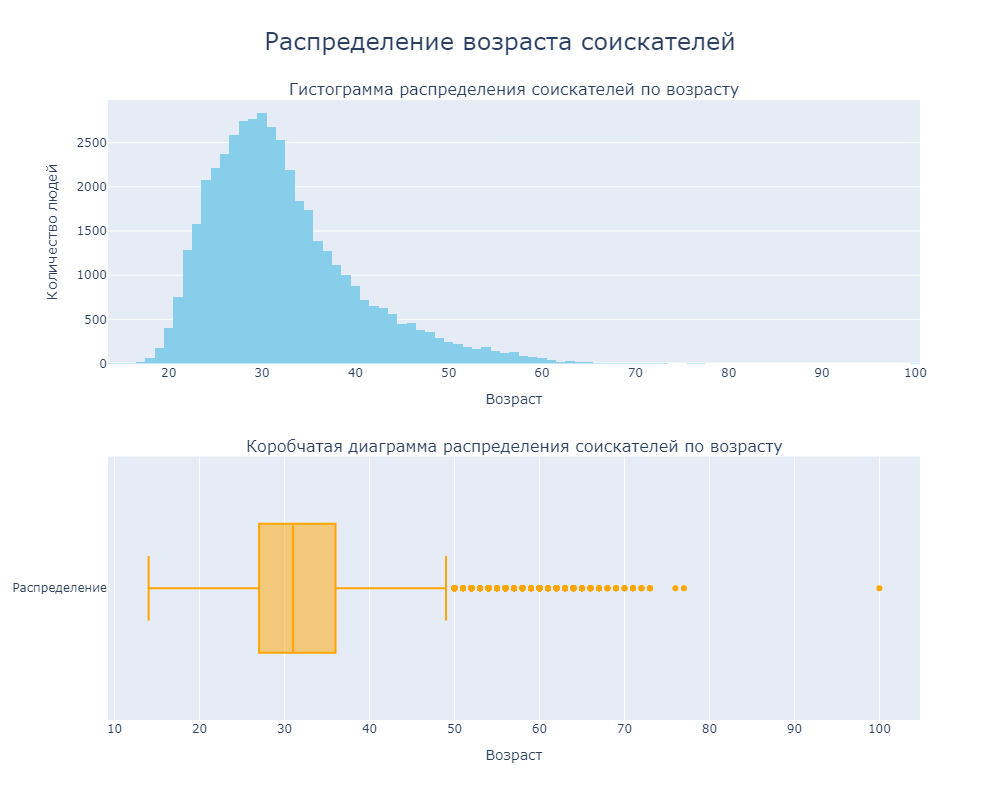

In [25]:
# Создание фигуры с двумя подграфиками
fig = make_subplots(
    rows=2, 
    cols=1,
    subplot_titles=("Гистограмма распределения соискателей по возрасту", "Коробчатая диаграмма распределения соискателей по возрасту"),
    vertical_spacing=0.15
    )

# Добавление гистограммы
histogram = px.histogram(
    hh_data, 
    x='Возраст', 
    nbins=0,  
    color_discrete_sequence=['skyblue']
    )
fig.add_trace(histogram.data[0], row=1, col=1)

# Добавление боксплота
box_plot = go.Box(
    x=hh_data['Возраст'],
    name='Распределение',
    marker_color='orange',
    orientation='h'
)
fig.add_trace(box_plot, row=2, col=1)

# Настройка заголовков и осей
fig.update_layout(
    title={
        'text': "Распределение возраста соискателей",
        'x': 0.5,  # Центрирование заголовка
        'xanchor': 'center',  # Якорь по X для центрирования
        'font': {
            'size': 24  # Размер шрифта заголовка
        }
    },
    showlegend=False,
    width=1000,
    height=800,
    xaxis_title = 'Возраст',
    yaxis_title = 'Количество людей',
    xaxis2_title = 'Возраст'
)

# Показать график
#fig.show()

fig.write_image('Images/hist_age.png')
Image('Images/hist_age.png')

Гистограмма в данном случае - логнормальное распределение, где ${\sigma \sim \frac{1}{4}}$


* Из *гистограммы* видно, что наиболее распространенное значение (*мода*) = **30**
* Минимальное и максимальное значения для возраста из *коробчатой диаграммы* = **(14, 100)** соответственно.\
    Возраст большинства соискателей находится в пределах от **27** до **36** лет
* Из *Коробчатой диаграммы* можно установить, что выбросы есть - это соискатели после **50** лет.


2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?

'Мода = 81.0'

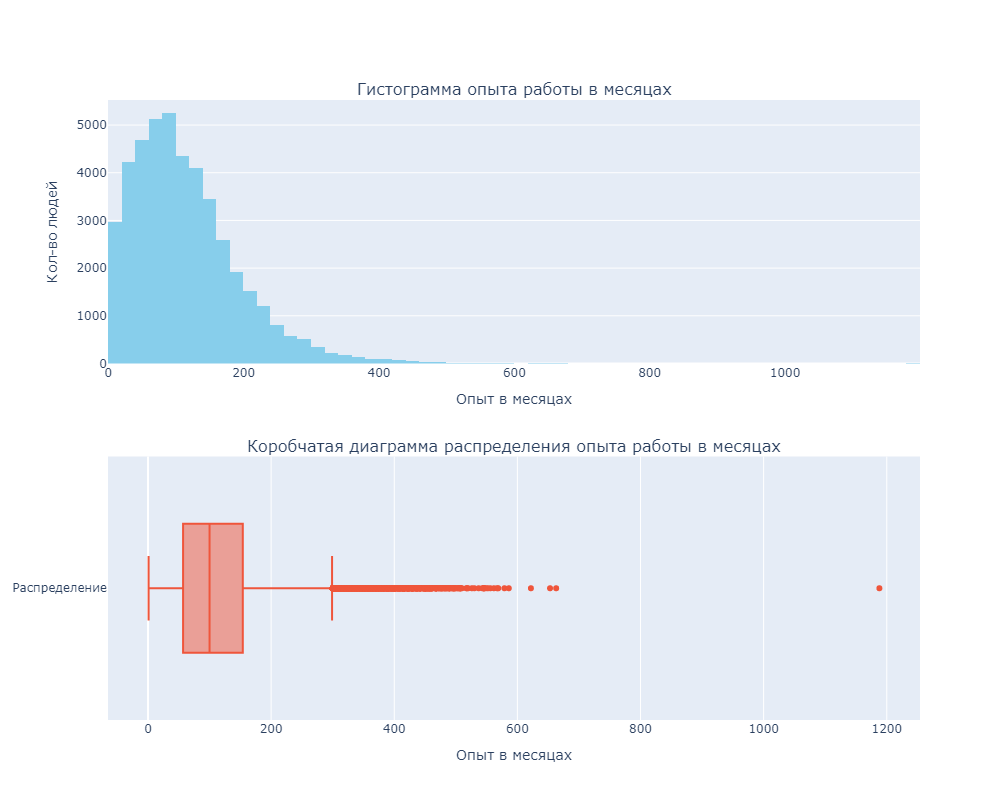

In [36]:
fig = make_subplots(
    rows=2,
    cols=1,
    subplot_titles=('Гистограмма опыта работы в месяцах', 'Коробчатая диаграмма распределения опыта работы в месяцах'),
    vertical_spacing=0.15
)

# Построение гистограммы
histogram = px.histogram(
    data_frame=hh_data,
    x='Опыт работы(месяц)',
    nbins=100,
    color_discrete_sequence=['skyblue']
)
fig.add_trace(histogram.data[0], row=1, col=1)

# Построение боксплота
box_plot = go.Box(
    x=hh_data['Опыт работы(месяц)'],
    name='Распределение',
    orientation='h',
)
fig.add_trace(box_plot, row=2, col=1)

# Настройка графиков
fig.update_layout(
    showlegend=False,
    width=1000,
    height=800,
    xaxis_title='Опыт в месяцах',
    yaxis_title='Кол-во людей',
    xaxis2_title='Опыт в месяцах'
)
#fig.show()
display(f'Мода = {hh_data['Опыт работы(месяц)'].mode()[0]}')

fig.write_image('Images/hist_exp.png')
Image('Images/hist_exp.png')

Гистограмма в данном случае - логнормальное распределение, где ${\sigma \sim \frac{3}{2}}$

* Мода распределения = **81** месяц
* Предельные значения для опыта (в месяцах) = **1 и 1188** соответственно
* В данном признаке также присутствуют аномалии - это опыт после **300** месяцев (25 лет)

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.


'Мода ЗП = 50000.0'

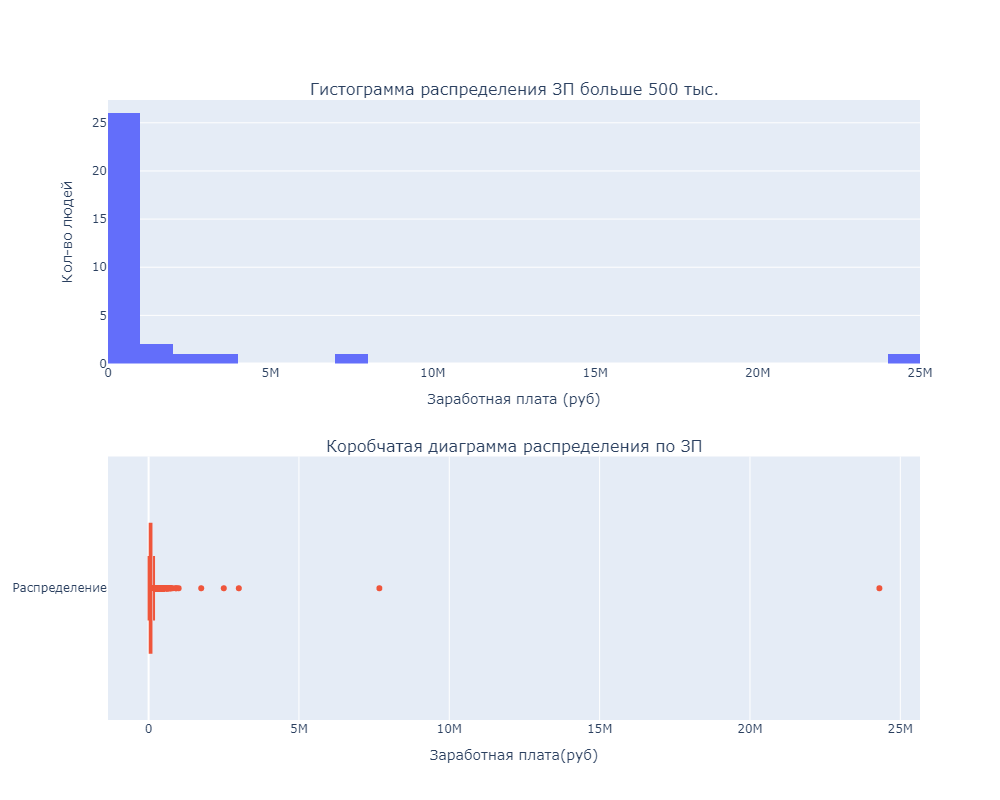

In [35]:
fig = make_subplots(
    rows=2,
    cols=1,
    subplot_titles=('Гистограмма распределения ЗП больше 500 тыс.', 'Коробчатая диаграмма распределения по ЗП'),
    vertical_spacing=0.15
)

# гистограмма для определения кол-ва людей с ЗП > 1000000
histogram = px.histogram(
    data_frame=hh_data[hh_data['ЗП(руб)'] > 500000],
    x='ЗП(руб)',
    nbins= 30,
    range_x=[0, 1000000]
)
fig.add_trace(histogram.data[0], row=1, col=1)

box_plot = go.Box(
    x=hh_data['ЗП(руб)'],
    orientation='h',
    name='Распределение'
)
fig.add_trace(box_plot, row=2, col=1)

fig.update_layout(
    width=1000,
    height=800,
    showlegend=False,
    xaxis_title='Заработная плата (руб)',
    yaxis_title='Кол-во людей',
    xaxis2_title='Заработная плата(руб)'
)

#fig.show()
display(f'Мода ЗП = {hh_data['ЗП(руб)'].mode()[0]}')

fig.write_image('Images/hist_sal.png')
Image('Images/hist_sal.png')

* Мода Заработной платы = 50000.0
* Предельные значения признака = 1 и 24.3 млн
* Большинство заработных плат наодятся в промежутке от 37 тыс до 95 тыс
* Аномалии по заработной плате начинаются от 180 тыс. руб.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

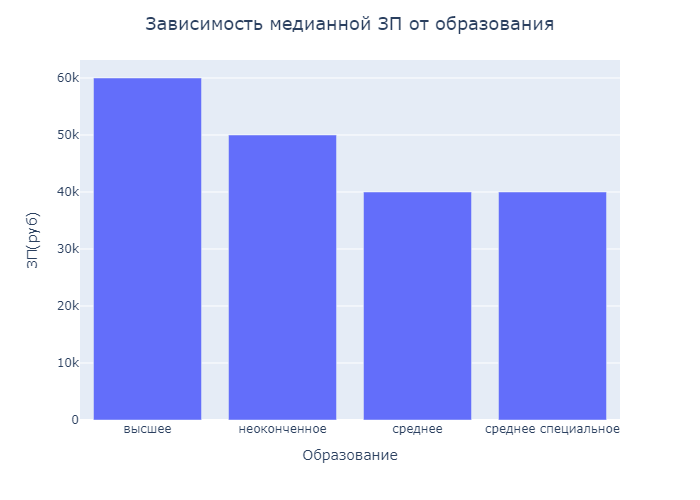

In [37]:
# Фильтрация и группировка по признакам
salary_education_dep = hh_data[hh_data['ЗП(руб)'] < 1000000].groupby('Образование')['ЗП(руб)'].median()
salary_education_dep = salary_education_dep.reset_index()

# Столбчатая диаграмма, тк исследование по показателям категории
fig = px.bar(
    salary_education_dep,
    x='Образование',
    y='ЗП(руб)'
)

#Визуальная настройка Графика
fig.update_layout(
    title={
        'text': "Зависимость медианной ЗП от образования",
        'x': 0.5,  # Центрирование заголовка
        'xanchor': 'center',  # Якорь по X для центрирования
        'font': {
            'size': 18  # Размер шрифта заголовка
        }
    },
    showlegend=False,
    width=700,
    height=500,
)

#fig.show()

fig.write_image('Images/bar_sal_educ.png')
Image('Images/bar_sal_educ.png')

* Наибольшие и наименьшие уровни ЗП наблюдаются у высшего и среднего/средне-специального образования соответсвенно
* Признак важен для прогнозирования, так как явно видно, что у высшего/неоконченного уровень ЗП будет выше

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

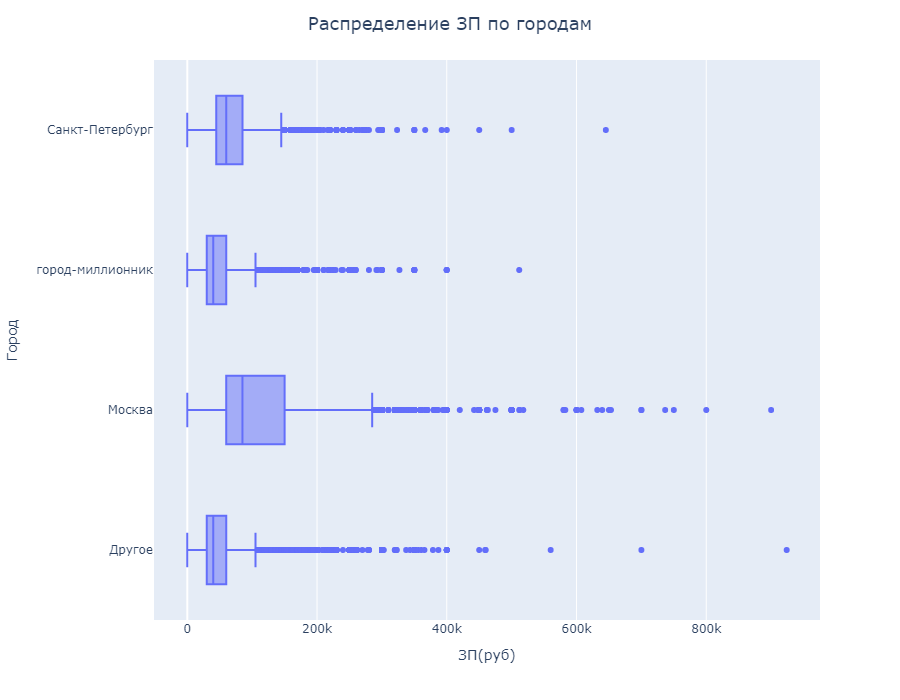

In [38]:
fig = px.box(
    hh_data[hh_data['ЗП(руб)'] < 1000000],
    x='ЗП(руб)',
    y='Город',
    orientation='h'
)

fig.update_layout(
    title={
        'text': 'Распределение ЗП по городам',
        'x': 0.5,
        'xanchor': 'center',
        'font':{
            'size': 18
        }
    },
    width=900,
    height=700
)
#fig.show()
fig.write_image('Images/box_sal_city.png')
Image('Images/box_sal_city.png')


* Из распределения можно сделать выводы:  
1 - 'Другое' и 'город-миллионник' можно объеденить в одну категорию, тк их распределения практически одиннаковые, отличаются только выбросы, но мы в дальнейшем от них будем избавляться (скорее всего), следовательно, на результат никак не повлияют;  
2 - Самый большой размах и медианное значение в Москве;  
3 - у Санкт-Петербурга размах 150 тыс., медианное значение 60 тыс. - это середина между Москвой и другими городами  
* Признак 'Город' важен для анализа, так как данные у Москвы слишком сильно отличаются от регионов.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

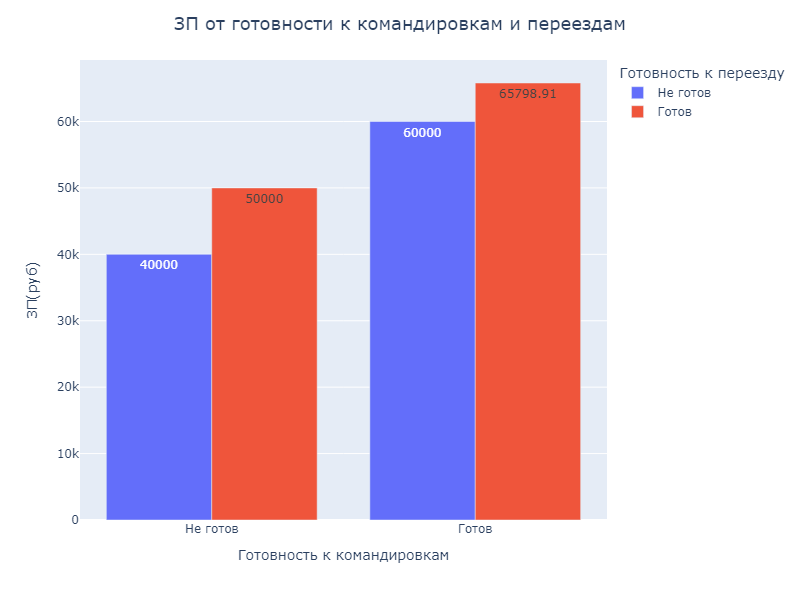

In [41]:
# Группировка данных и подсчет медианной зарплаты
ready2trip_reloc = hh_data.groupby(['Готовность к командировкам', 'Готовность к переезду'])['ЗП(руб)'].median().reset_index()

# Реализация более читаемых подписей
ready2trip_reloc['Готовность к командировкам'] = ready2trip_reloc['Готовность к командировкам'].replace({True: 'Готов', False: 'Не готов'})
ready2trip_reloc['Готовность к переезду'] = ready2trip_reloc['Готовность к переезду'].replace({True: 'Готов', False: 'Не готов'})

# Построение графика
bar_plot = px.bar(
    ready2trip_reloc,
    x='Готовность к командировкам',
    y='ЗП(руб)',
    color='Готовность к переезду',
    barmode='group',
    text='ЗП(руб)'
)

# Настройка изображения графика 
bar_plot.update_layout(
    title={
        'text':'ЗП от готовности к командировкам и переездам',
        'x': 0.5,
        'xanchor': 'center',
        'font':{
            'size': 18
        }
    },
    width=800,
    height=600
)
#bar_plot.show()
bar_plot.write_image('Images/bar_trip.png')
Image('Images/bar_trip.png')

Завичимость размера заработной платы зависит от готовности к переезду и командировкам;  
Так самая низкая ЗП у тех, кто не готов ни к чему, высокая - ко всему;  
Но выше оценивается готовность к командировкам.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

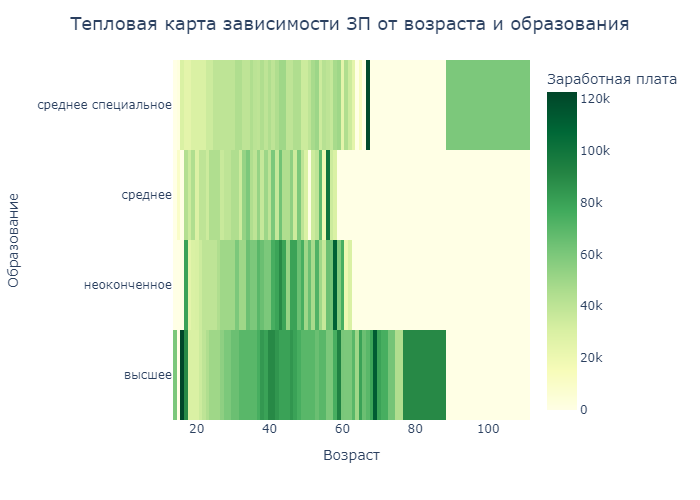

In [42]:
# Сводная таблица: медианная ЗП от возраста и образования
age_education = pd.pivot_table(
    hh_data,
    values='ЗП(руб)',
    index=['Образование'],
    columns=['Возраст'],
    aggfunc='median',
    fill_value=0
)

# Построение тепловой карты
fig = px.imshow(
    age_education, 
    color_continuous_scale='ylgn', 
    origin='lower',
    labels={'color': 'ЗП'})

# Настройки отображения графика
fig.update_layout(
    title={
        'text': 'Тепловая карта зависимости ЗП от возраста и образования',
        'x': 0.5,
        'xanchor': 'center',
        'font':{
            'size':18
        }
    },
    coloraxis_colorbar={
        'title':'Заработная плата'
    }
)
#fig.show()
fig.write_image('Images/heatmap_sal_educ.png')
Image('Images/heatmap_sal_educ.png')

У людей с средним и средне специльным образованием практически нет роста ЗП, тогда как с высшим и неоконченным наблюдается рост с 30 до 90 тыс.руб. к 40-50 годам.  
Причем самый быстрый карьерный рост у людей с высшим.

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

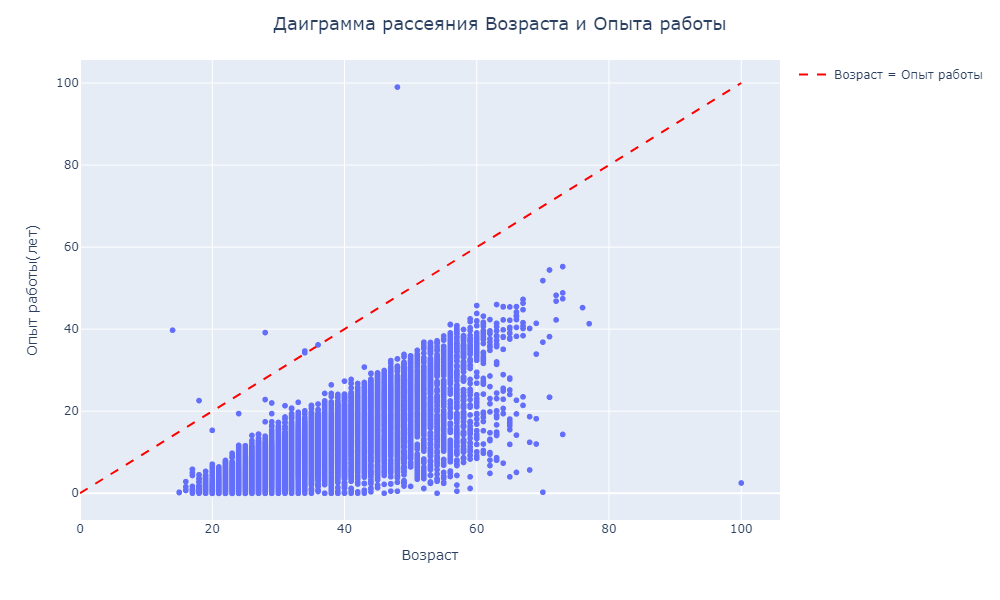

In [44]:
# Срез DataFrame по опыту и возрасту, чтобы не затереть данные в исходной
exp_age = hh_data.loc[:, ('Опыт работы(месяц)','Возраст')]
# Преобразование месяцев в годы
exp_age['Опыт работы(лет)'] = exp_age['Опыт работы(месяц)'].fillna(0) / 12

# Построение диаграммы рассеяния
fig = px.scatter(
    exp_age,
    x='Возраст',
    y='Опыт работы(лет)'
);

# Добавление прямой (пунктирной) линии
fig.add_trace(
    go.Scatter(
        x=[0, 100],
        y=[0, 100],
        mode='lines',
        line={
            'color': 'red',
            'dash': 'dash'
        },
        name='Возраст = Опыт работы'
    )
);

# Настройка отображения графика
fig.update_layout(
    title={
        'text': 'Даиграмма рассеяния Возраста и Опыта работы',
        'x': 0.5,
        'xanchor': 'center',
        'font':{
            'size':18
        }
    },
    width=1000,
    height=600
)

#fig.show()
fig.write_image('Images/scatter_exp_age.png')
Image('Images/scatter_exp_age.png')

Точки выше или на линии - это аномалии, так как опыт работы у человека начался с рождения или даже до.

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


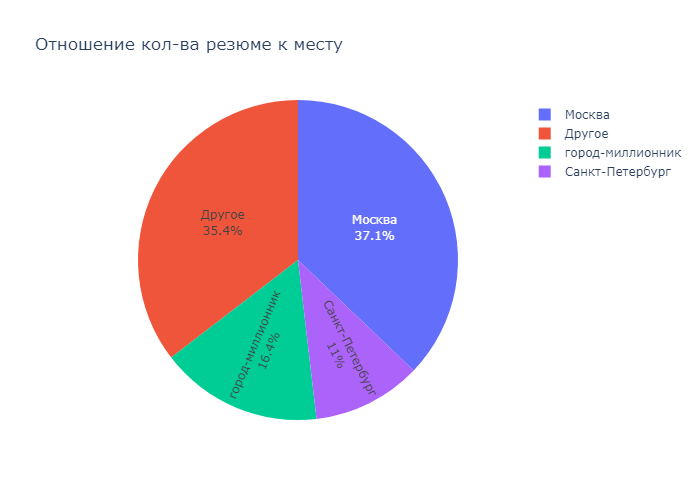

In [45]:
# Определение доли городов в резюме
city = round(hh_data['Город'].value_counts(normalize=True)*100, 1)
city = city.reset_index()
city.columns = ['Город', 'Кол-во резюме в %']

# Круговая диаграмма зависимости кол-ва резюму от места
fig = px.pie(
    city,
    values='Кол-во резюме в %',
    names='Город',
    title='Отношение кол-ва резюме к месту'
)
# Добавление подписей на диаграмму
fig.update_traces(textposition='inside', textinfo='percent+label')

#fig.show()
fig.write_image('Images/pie_city_resume.png')
Image('Images/pie_city_resume.png')

Видно, что больше всего соискателей в процентном соотнешении в Москве и маленьких городах/селах.

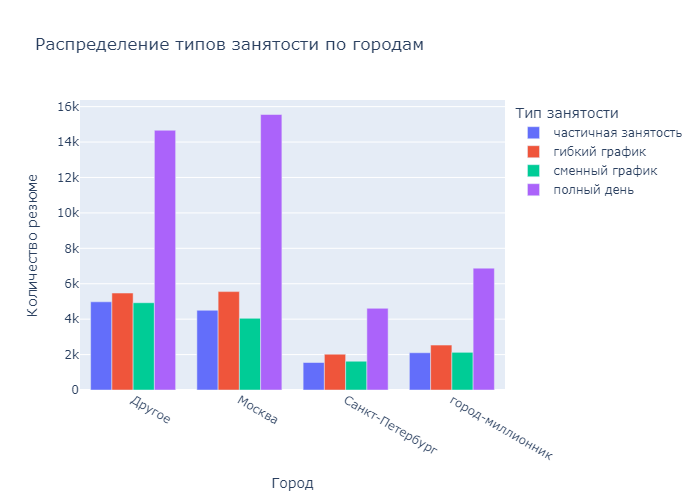

In [46]:
# Определение кол-ва типов занятости по городам
employment_types = hh_data.groupby('Город')[['частичная занятость', 'гибкий график', 'сменный график', 'полный день']].sum().reset_index()
# Unpivot для dataFrame
df_melted = employment_types.melt(id_vars='Город', var_name='Тип занятости', value_name='Количество')

# Построение группированной столбчатой диаграммы
fig = px.bar(
    df_melted, 
    x='Город', 
    y='Количество', 
    color='Тип занятости',
    barmode='group',
    title='Распределение типов занятости по городам',
    labels={'Количество': 'Количество резюме'}
)

#fig.show()
fig.write_image('Images/bar_city_type_employ.png')
Image('Images/bar_city_type_employ.png')

Во всех городах можно увидеть "одинаковую" картину распределения типа занятости.  
То есть преобладает полная занятость, а остальные находятся примерно в одинаковых долях

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

#### *Здесь какая-то ошибка в ответах на задание или недочет у меня*  
В ответах на курсе - 155 или 161.  
У меня - 158, попробовал своим и методом из курса.  
P.S. Проверил, что в дальнейшем на ответы не повлияло!

In [53]:
# Удаление дупликатов
hh_data_without_duplicates = hh_data.drop_duplicates()
display(hh_data.shape[0] - hh_data_without_duplicates.shape[0])

# duplicates = hh_data[hh_data.duplicated(subset=hh_data.columns)]
# data = hh_data.drop_duplicates()
# print(duplicates.shape[0])

158

2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [54]:
# Уоличество дупликатов к колонках
hh_data_without_duplicates.isna().sum()

Ищет работу на должность:            0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Обновление резюме                    0
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы(месяц)                 168
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
волонтерство                         0
полная занятость                     0
проектная работа                     0
стажировка                           0
частичная занятость                  0
вахтовый метод                       0
гибкий график                        0
полный день                          0
сменный график                       0
удаленная работа                     0
ЗП(руб)                              0
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [55]:
# Удаление пропусков по месту работы и должностях
hh_data_without_duplicates = hh_data_without_duplicates.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])
# Заполнения опыта работы медианным значением
hh_data_without_duplicates = hh_data_without_duplicates.fillna(hh_data_without_duplicates['Опыт работы(месяц)'].median())
display(f'Среднее значение по опыту работы: {round(hh_data_without_duplicates['Опыт работы(месяц)'].mean())}')


'Среднее значение по опыту работы: 114'

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [56]:
# Фильтрация ЗП < 1000 и > 1000000 руб.
mask = (hh_data_without_duplicates['ЗП(руб)'] < 1000) | (hh_data_without_duplicates['ЗП(руб)'] > 1000000)
# Удаление выбросов ЗП по маске
hh_data_without_duplicates_filtered = hh_data_without_duplicates.drop(hh_data_without_duplicates[mask].index)

display(f'Найдено {hh_data_without_duplicates.shape[0] - hh_data_without_duplicates_filtered.shape[0]} выбросов')

'Найдено 89 выбросов'

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [57]:
# Вычисление Опыта в годах
experience = hh_data_without_duplicates_filtered['Опыт работы(месяц)'] / 12
# Маска, когда возраст < опыта работы
mask = hh_data_without_duplicates_filtered['Возраст'] < experience

display(f'Количество выбросов по возрасту = {mask.sum()}')
hh_data_without_duplicates_filtered = hh_data_without_duplicates_filtered.drop(hh_data_without_duplicates_filtered[mask].index)

'Количество выбросов по возрасту = 7'

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

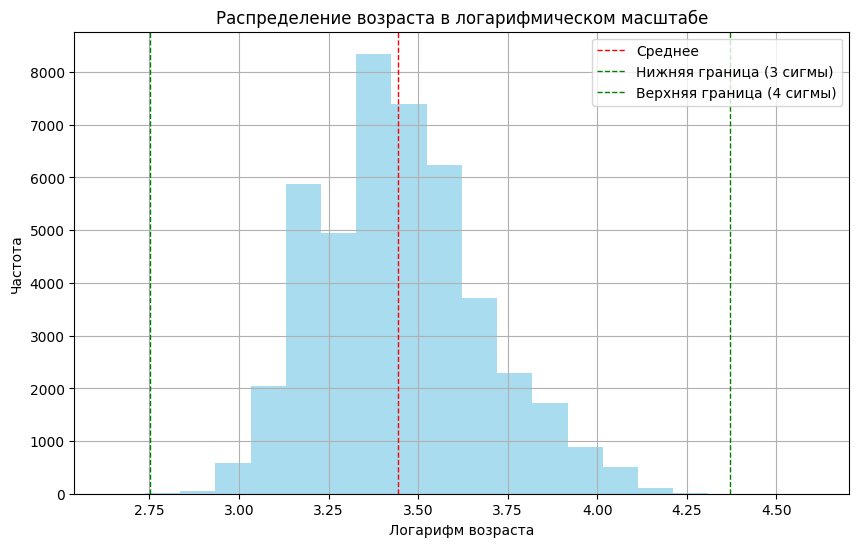

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы(месяц),Город,...,полная занятость,проектная работа,стажировка,частичная занятость,вахтовый метод,гибкий график,полный день,сменный график,удаленная работа,ЗП(руб)
31137,Менеджер по работе с клиентами,"ООО ""ФёрстКэшКомпани""",Менеджер по работе с клиентами,06.04.2019 09:13,Не указано,среднее,М,15,2.0,Санкт-Петербург,...,False,False,False,True,False,True,False,True,True,10000.0
32950,Тестировщик игр,OOO ЖМЫХ,Тестировщик ПО,09.04.2019 16:02,Не указано,среднее специальное,М,15,3.0,Другое,...,True,False,False,False,False,False,True,False,False,2000.0
33654,Frontend-разработчик,Freelance,Frontend-разработчик,19.04.2019 23:27,Не указано,среднее специальное,М,100,30.0,Санкт-Петербург,...,True,True,True,True,False,True,True,False,True,60000.0


In [58]:
hh_data['Лог возраст'] = np.log(hh_data['Возраст'])

# Вычисление среднего и стандартного отклонения в логарифмическом масштабе
mean_log_age = hh_data['Лог возраст'].mean()
std_log_age = hh_data['Лог возраст'].std()

# Границы интервала метода трёх сигм
lower_bound = mean_log_age - 3 * std_log_age
upper_bound = mean_log_age + 4 * std_log_age

# Построение распределения в логарифмическом масштабе
plt.figure(figsize=(10, 6))
plt.hist(hh_data['Лог возраст'], bins=20, color='skyblue', alpha=0.7)
plt.title('Распределение возраста в логарифмическом масштабе')
plt.xlabel('Логарифм возраста')
plt.ylabel('Частота')

# Линии среднего и границы интервала трёх сигм
plt.axvline(mean_log_age, color='red', linestyle='dashed', linewidth=1, label='Среднее')
plt.axvline(lower_bound, color='green', linestyle='dashed', linewidth=1, label='Нижняя граница (3 сигмы)')
plt.axvline(upper_bound, color='green', linestyle='dashed', linewidth=1, label='Верхняя граница (4 сигмы)')

plt.legend()
plt.grid(True)
plt.show()


# Функция реализация z-отклонений
def outliers_z_score(data:pd.DataFrame, feature:str, log_scale:bool=False, lower:int=3, upper:int=3):
    if log_scale:
        # Отсечение 0 значений для логорифмирования
        data = data[data[feature] > 0]
        x = np.log(data[feature])
    else:
        x = data[feature]
    
    mu = x.mean()
    sigma = x.std()
    
    lower_bound = mu - lower*sigma
    upper_bound = mu + upper*sigma
    outliers = data[(x < lower_bound) | (x>upper_bound)]
    return outliers

outliers = outliers_z_score(hh_data_without_duplicates_filtered, 'Возраст', log_scale=True, upper=4)
display(outliers)
hh_data_final = hh_data_without_duplicates_filtered.drop(outliers.index)

Из данного рисунка наблюдается **правосторонняя** асимметрия, так как чаще в распределении встречаются значения меньше среднего